####Reto 1- Naive Bayes

# Crear un modelo Naive Bayes para la preaprobación de créditos para la totalidad de los solicitantes del crédito de la base de datos de referencia.
Las variables socioeconómicas que describen un solicitante de crédito son las siguientes: Edad, Hijos, Personas a Cargo, Estrato, Ingresos, Egresos, Monto, Plazo y Cuota.
Recalcula las métricas de evaluación bajo este nuevo escenario y para cada métrica explica si mejoraron o desmejoraron y las razones identificadas.C

In [1]:
import pandas as pd

from google.colab import drive
drive.mount ('/content/drive')


Mounted at /content/drive


In [3]:
solicitantes = pd.read_excel('/content/drive/MyDrive/Analítica/0. SolicitantesCrédito.xlsx')

In [4]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

In [5]:
solicitantes.shape

(8378, 35)

In [6]:
XD = solicitantes.dropna(subset='PreApr')

In [7]:
 XD.shape

(5842, 35)

In [8]:
## el modelo
XD = XD[['Edad','Hijos', 'Perscargo','Estrato', 'Ingresos','Egresos','Monto (EAD)', 'Plazo', 'Cuota (COP)']]
XD

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
0,38,1,0,3,5424576,7585302,2.815030e+06,48,82691.506204
1,51,6,1,4,1144064,1640079,6.301439e+05,36,22781.212598
2,37,2,0,3,2069853,2831440,1.280540e+06,36,46294.596244
3,29,1,0,2,1893080,2482276,1.393414e+06,24,69564.950015
4,42,3,4,2,3000367,3630221,2.252986e+06,24,112478.307883
...,...,...,...,...,...,...,...,...,...
8371,48,0,0,3,4831392,3392105,3.366188e+06,36,121695.762156
8373,31,2,0,5,5891088,4292158,3.918572e+06,48,115108.056436
8374,38,0,0,3,3092079,3028098,2.677266e+06,36,96789.562091
8375,43,1,2,2,2542007,3513112,1.375112e+06,36,49713.608249


In [9]:
yd = solicitantes['PreApr'].dropna()
yd

,PreApr
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
8371,1.0
8373,1.0
8374,1.0
8375,1.0


In [10]:
import numpy as np
XDArray = np.array(XD, dtype=float)
ydArray = np.array(yd, dtype=float)

XDArray

array([[3.80000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        2.81503004e+06, 4.80000000e+01, 8.26915062e+04],
       [5.10000000e+01, 6.00000000e+00, 1.00000000e+00, ...,
        6.30143930e+05, 3.60000000e+01, 2.27812126e+04],
       [3.70000000e+01, 2.00000000e+00, 0.00000000e+00, ...,
        1.28054021e+06, 3.60000000e+01, 4.62945962e+04],
       ...,
       [3.80000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        2.67726552e+06, 3.60000000e+01, 9.67895621e+04],
       [4.30000000e+01, 1.00000000e+00, 2.00000000e+00, ...,
        1.37511242e+06, 3.60000000e+01, 4.97136082e+04],
       [3.70000000e+01, 1.00000000e+00, 2.00000000e+00, ...,
        4.52536592e+06, 3.60000000e+01, 1.63602819e+05]])

In [ ]:
ydArray

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
modelNB = GaussianNB()

In [13]:
modelNB = modelNB.fit(XDArray,ydArray)
modelNB

GaussianNB()

In [14]:
ydPred = modelNB.predict(XDArray)
ydPred

array([1., 0., 0., ..., 0., 0., 1.])

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
cm = confusion_matrix(ydArray, ydPred)
cm

array([[2539,  420],
       [1041, 1842]])

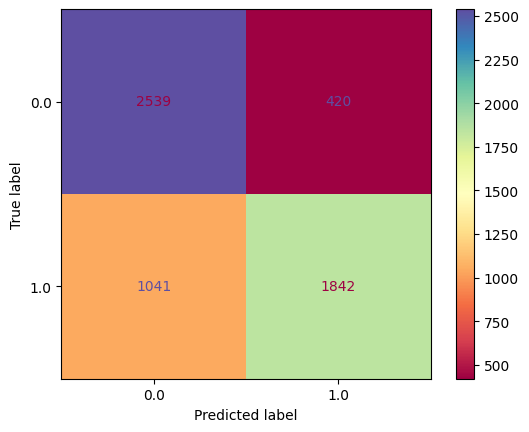

In [17]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelNB.classes_)
disp.plot(cmap= 'Spectral')
plt.show()

In [18]:
# MÉTRICAS DE EVALUACIÓN

VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

VN, FP, FN, VP

#MÉTRICAS

#Exactitud (Accuracy)
exactitud = (VN+VP)/cm.sum()
print(f'La Exactitud(accuracy) del modelo es de: {exactitud:.2%}')

#Tasa de error
error =1-exactitud
print(f'La Tasa de Errores(error) del modelo es de: {error:.2%}')

#Precisión
precision = VP/(FP+VP)
print(f'La Precisión(precision) del modelo es de: {precision:.2%}')

#Sensibilidad (Recall)
sensibilidad = VP/(VP+FN)
print(f'La Sensibilidad(sensibilidad) del modelo es de: {sensibilidad:.2%}')

#Especificidad
especificidad = VN/(VN+FP)
print(f'La Especificidad(especificidad) del modelo es de: {especificidad:.2%}')


La Exactitud(accuracy) del modelo es de: 74.99%
La Tasa de Errores(error) del modelo es de: 25.01%
La Precisión(precision) del modelo es de: 81.43%
La Sensibilidad(sensibilidad) del modelo es de: 63.89%
La Especificidad(especificidad) del modelo es de: 85.81%


In [19]:
XDGener = solicitantes[solicitantes['PreApr'].isna()]

In [21]:
XDGener.shape

(2536, 35)

In [22]:
XDGener = XDGener[['Edad','Hijos', 'Perscargo','Estrato', 'Ingresos','Egresos','Monto (EAD)', 'Plazo', 'Cuota (COP)']]
XDGener

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
6,38,3,0,3,1534711,1658694,7.913126e+05,60,2.009414e+04
7,47,0,0,2,136750,171155,1.213014e+05,48,3.563229e+03
11,46,0,1,4,7097220,9525257,3.174456e+06,3,1.090054e+06
13,37,4,2,2,1791987,1391431,2.334042e+06,48,6.856249e+04
16,22,1,0,2,2892545,3576891,1.887636e+06,36,6.824255e+04
...,...,...,...,...,...,...,...,...,...
8357,24,1,0,4,2433168,1518301,3.494059e+06,48,1.026380e+05
8358,66,1,0,1,83684,120852,3.822821e+04,24,1.908509e+03
8367,32,0,1,4,1133063,766199,1.013852e+06,36,3.665316e+04
8372,35,2,1,3,3073152,3812690,2.156239e+06,18,1.375805e+05


In [23]:
XDGenerArray = np.array(XDGener, dtype=float)

In [24]:
ydGener = modelNB.predict(XDGenerArray)
ydGener

array([0., 0., 1., ..., 0., 0., 0.])

In [25]:
ydGenerSerie = pd.Series(ydGener,
                         index = solicitantes[solicitantes['PreApr'].isna()].index)
ydGenerSerie

,0
6,0.0
7,0.0
11,1.0
13,0.0
16,0.0
...,...
8357,0.0
8358,0.0
8367,0.0
8372,0.0


In [26]:
solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)

<ipython-input-26-88e48b22ac6f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)


In [27]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

In [28]:
solicitantes.to_excel('Solicitantes_Completo2.xlsx')

### Comparación Métricas de Evaluación:

Métrica	 Modelo 1 (9 variables)	  Modelo 2 (4 variables)

Exactitud	 74.99%                   76.14%

Tasa de Error	 25.01%	             23.86%

Precisión	 81.43%	                 81.01%

Sensibilidad	63.89%	             67.46%

Especificidad	 85.81%	             84.59%


Exactitud y Tasa de Error: El modelo de 4 variables tiene una ligera ventaja en exactitud (76.14%) y una menor tasa de error (23.86%) en comparación con el modelo actual de 9 variables (74.99% y 25.01%, respectivamente). Esto indica que el modelo con menos variables predice correctamente un porcentaje ligeramente mayor de casos.

Precisión: La precisión es muy similar en ambos modelos, con una ligera ventaja para el primer modelo (9 variables) con 81.43% frente a 81.01% del segundo modelo. Esto sugiere que ambos modelos tienen una tasa similar de falsos positivos,o sea que son igualmente propensos a preaprobar créditos a solicitantes que no deberían ser aprobados.

Sensibilidad: El modelo de 4 variables mantiene una mayor sensibilidad (67.46%) que el modelo de 9 variables (63.89%). Esto significa que el modelo con menos variables sigue siendo mejor para identificar correctamente a los solicitantes que deberían ser preaprobados, teniendo una menor tasa de falsos negativos.

Especificidad: El modelo actual (9 variables) tiene una especificidad ligeramente mayor (85.81%) que el otro modelo de 4 variables (84.59%). Esto implica que el modelo con más variables es un poco mejor para identificar correctamente a los solicitantes que no deberían ser preaprobados.


Conclusión:

A pesar de que el modelo actual (9 variables) tiene una precisión y especificidad ligeramente mejores, el otro modelo (4 variables) presenta un mejor rendimiento general en términos de exactitud y sensibilidad. Esto significa que el modelo de 4 variables tiene una mayor probabilidad de predecir correctamente si un solicitante debe ser preaprobado o no (exactitud).